<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/tmd_wheelchair/June_10sec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = np.load('/content/drive/MyDrive/TMD_data/train_10s_data.npy')
train_label = np.load('/content/drive/MyDrive/TMD_data/train_10s_label.npy')

val_data = np.load('/content/drive/MyDrive/TMD_data/valid_10s_data.npy')
val_label= np.load('/content/drive/MyDrive/TMD_data/valid_10s_label.npy')

In [4]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(10920, 600, 10)
(10920, 7)
(2275, 600, 10)
(2275, 7)


In [11]:
# CRNN with 3층 GRU
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 596, 64)           3264      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 119, 64)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 115, 128)          41088     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 23, 128)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 128)           0         
                                                                 
 gru_12 (GRU)                (None, 23, 128)          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/500
6/6 - 6s - loss: 1.8563 - accuracy: 0.2343 - val_loss: 1.7183 - val_accuracy: 0.3310 - 6s/epoch - 964ms/step
Epoch 2/500
6/6 - 1s - loss: 1.6071 - accuracy: 0.4249 - val_loss: 1.5035 - val_accuracy: 0.4347 - 779ms/epoch - 130ms/step
Epoch 3/500
6/6 - 1s - loss: 1.4349 - accuracy: 0.4825 - val_loss: 1.3779 - val_accuracy: 0.4646 - 690ms/epoch - 115ms/step
Epoch 4/500
6/6 - 1s - loss: 1.3425 - accuracy: 0.5047 - val_loss: 1.3346 - val_accuracy: 0.4686 - 707ms/epoch - 118ms/step
Epoch 5/500
6/6 - 1s - loss: 1.1953 - accuracy: 0.5579 - val_loss: 1.4146 - val_accuracy: 0.4479 - 711ms/epoch - 119ms/step
Epoch 6/500
6/6 - 1s - loss: 1.1610 - accuracy: 0.5685 - val_loss: 1.2470 - val_accuracy: 0.5165 - 697ms/epoch - 116ms/step
Epoch 7/500
6/6 - 1s - loss: 1.1170 - accuracy: 0.5716 - val_loss: 1.3136 - val_accuracy: 0.4963 - 705ms/epoch - 117ms/step
Epoch 8/500
6/6 - 1s - loss: 1.0430 - accuracy: 0.6195 - val_loss: 1.1888 - val_accuracy: 0.5160 - 695ms/epoch - 116ms/step
Epoch 9/500

72/72 [==============================] - 0s 5ms/step - loss: 1.7977 - accuracy: 0.6927


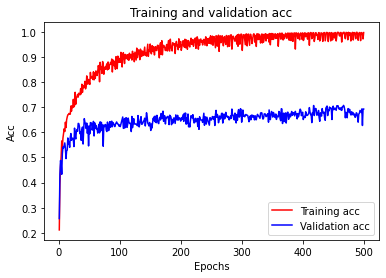

In [10]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/CRNN_GRU_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with 3층 GRU
# accuracy: 0.6927
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [5]:
# CRNN cnn층 크게 
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=1000,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 596, 32)           1632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 119, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 115, 64)           10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 19, 128)           41088     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 128)           0

72/72 [==============================] - 0s 5ms/step - loss: 1.8195 - accuracy: 0.6633


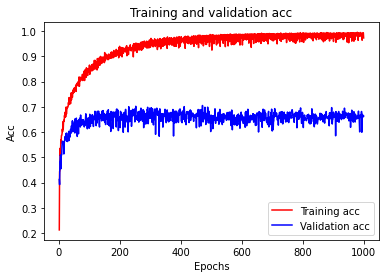

In [6]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/CRNN_GRU_addcnn.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with GRU cnn층 크게
# accuracy: 0.6633
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [9]:
# CRNN LSTM
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             kernel_regularizer=regularizers.l2(0.001),
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             kernel_regularizer=regularizers.l2(0.001)))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(64, kernel_regularizer=regularizers.l2(0.001), dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(learning_rate = 0.0008)

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 596, 64)           3264      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 119, 64)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 115, 128)          41088     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 23, 128)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 128)           0         
                                                                 
 lstm_8 (LSTM)               (None, 64)               

72/72 [==============================] - 0s 5ms/step - loss: 1.6362 - accuracy: 0.6822


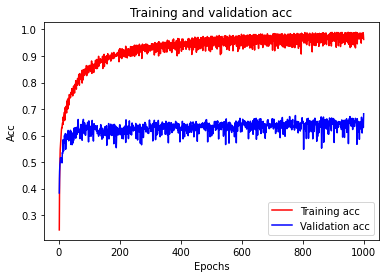

In [10]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/CRNN_LSTM.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with LSTM
# accuracy: 0.6822
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [25]:
# CRNN LSTM lr 감소
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0008)

model_crnn.compile(optimizer=rmsprop,
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 119, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_24 (Conv1D)          (None, 115, 128)          41088     
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 23, 128)          0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 23, 128)           0         
                                                                 
 lstm_18 (LSTM)              (None, 23, 128)         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/1000


KeyboardInterrupt: ignored

72/72 [==============================] - 0s 6ms/step - loss: 2.5901 - accuracy: 0.6611


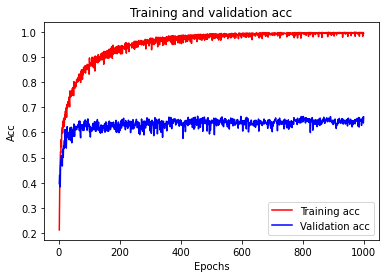

In [24]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/CRNN_LSTM_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with LSTM 3층
# accuracy: 0.6615
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [21]:
# CRNN LSTM lr 감소 버전2
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(64, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(32, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0008)

model_crnn.compile(optimizer=rmsprop,
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 119, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 115, 128)          41088     
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 23, 128)          0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 23, 128)           0         
                                                                 
 lstm_12 (LSTM)              (None, 23, 128)          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/1000
6/6 - 7s - loss: 1.8647 - accuracy: 0.2329 - val_loss: 1.7349 - val_accuracy: 0.3987 - 7s/epoch - 1s/step
Epoch 2/1000
6/6 - 1s - loss: 1.6340 - accuracy: 0.4176 - val_loss: 1.6239 - val_accuracy: 0.3925 - 719ms/epoch - 120ms/step
Epoch 3/1000
6/6 - 1s - loss: 1.5453 - accuracy: 0.4137 - val_loss: 1.4165 - val_accuracy: 0.4338 - 705ms/epoch - 118ms/step
Epoch 4/1000
6/6 - 1s - loss: 1.4078 - accuracy: 0.4699 - val_loss: 1.3876 - val_accuracy: 0.4510 - 710ms/epoch - 118ms/step
Epoch 5/1000
6/6 - 1s - loss: 1.2754 - accuracy: 0.5352 - val_loss: 1.3188 - val_accuracy: 0.4664 - 716ms/epoch - 119ms/step
Epoch 6/1000
6/6 - 1s - loss: 1.2493 - accuracy: 0.5349 - val_loss: 1.4287 - val_accuracy: 0.4580 - 716ms/epoch - 119ms/step
Epoch 7/1000
6/6 - 1s - loss: 1.1977 - accuracy: 0.5633 - val_loss: 1.3536 - val_accuracy: 0.4598 - 716ms/epoch - 119ms/step
Epoch 8/1000
6/6 - 1s - loss: 1.1392 - accuracy: 0.5839 - val_loss: 1.2094 - val_accuracy: 0.5134 - 714ms/epoch - 119ms/step
Epoch 

72/72 [==============================] - 0s 5ms/step - loss: 2.6705 - accuracy: 0.6334


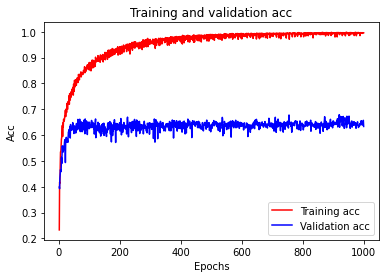

In [22]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/CRNN_LSTM_3layers_2.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with LSTM 3층 수정
# accuracy: 0.6334
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [14]:
model_crnn.fit(train_data,
                    train_label,
                    epochs=300,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=2)

model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/CRNN_LSTM_3layers.h5')
model_crnn.evaluate(val_data, val_label)

Epoch 1/300
6/6 - 1s - loss: 0.0178 - accuracy: 0.9949 - val_loss: 1.8085 - val_accuracy: 0.6756 - 945ms/epoch - 157ms/step
Epoch 2/300
6/6 - 1s - loss: 0.0558 - accuracy: 0.9837 - val_loss: 2.0650 - val_accuracy: 0.6681 - 795ms/epoch - 132ms/step
Epoch 3/300
6/6 - 1s - loss: 0.0157 - accuracy: 0.9948 - val_loss: 1.9071 - val_accuracy: 0.6699 - 797ms/epoch - 133ms/step
Epoch 4/300
6/6 - 1s - loss: 0.0176 - accuracy: 0.9940 - val_loss: 2.1922 - val_accuracy: 0.6558 - 798ms/epoch - 133ms/step
Epoch 5/300
6/6 - 1s - loss: 0.0227 - accuracy: 0.9935 - val_loss: 1.9845 - val_accuracy: 0.6708 - 790ms/epoch - 132ms/step
Epoch 6/300
6/6 - 1s - loss: 0.0396 - accuracy: 0.9886 - val_loss: 2.3627 - val_accuracy: 0.6308 - 799ms/epoch - 133ms/step
Epoch 7/300
6/6 - 1s - loss: 0.0329 - accuracy: 0.9894 - val_loss: 2.1169 - val_accuracy: 0.6523 - 794ms/epoch - 132ms/step
Epoch 8/300
6/6 - 1s - loss: 0.0142 - accuracy: 0.9954 - val_loss: 2.0877 - val_accuracy: 0.6558 - 798ms/epoch - 133ms/step
Epoch 9/

[2.5508038997650146, 0.6615384817123413]

In [15]:
# 1D CNN
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(64, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 198, 64)          0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 198, 64)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 194, 128)          41088     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 64, 128)          0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64, 128)          

72/72 [==============================] - 0s 4ms/step - loss: 7.8088 - accuracy: 0.6440


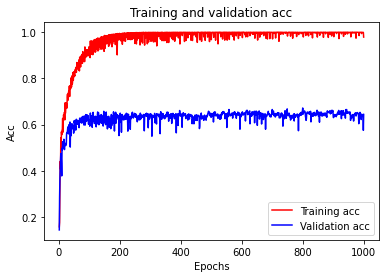

In [16]:
model_cnn.save('/content/drive/MyDrive/TmdJune/10sec/Conv1D.h5')
model_cnn.evaluate(val_data, val_label)

# 3층 1D convnet
# accuracy: 0.6440
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [17]:
# 1D CNN 2층
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(64, 5, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001),
                            input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(5))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Conv1D(128, 5, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 119, 64)          0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 119, 64)           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 115, 128)          41088     
                                                                 
 flatten_1 (Flatten)         (None, 14720)             0         
                                                                 
 dense_7 (Dense)             (None, 7)                 103047    
                                                      

72/72 [==============================] - 0s 3ms/step - loss: 3.8600 - accuracy: 0.6237


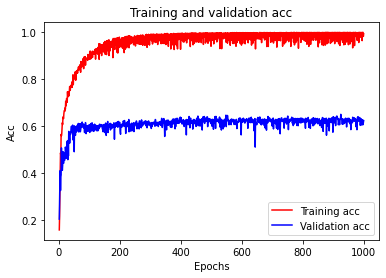

In [18]:
model_cnn.save('/content/drive/MyDrive/TmdJune/10sec/Conv1D_2layers.h5')
model_cnn.evaluate(val_data, val_label)

# 2층 1D convnet
# accuracy: 0.6237
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [19]:
# 1D CNN 2층
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(64, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0008)

model_cnn.compile(optimizer=rmsprop,
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=300,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 198, 64)          0         
 g1D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 198, 64)           0         
                                                                 
 conv1d_18 (Conv1D)          (None, 194, 128)          41088     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 64, 128)          0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)             

72/72 [==============================] - 0s 3ms/step - loss: 2.6798 - accuracy: 0.6145


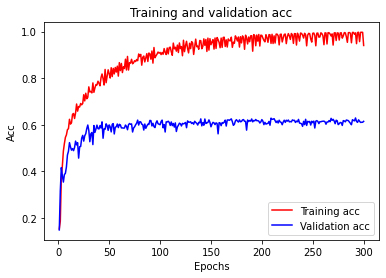

In [20]:
model_cnn.save('/content/drive/MyDrive/TmdJune/10sec/Conv1D_2layers_2.h5')
model_cnn.evaluate(val_data, val_label)

# 2층 1D convnet
# accuracy: 0.6145
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [26]:
# 1D CNN 5층
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 596, 32)           1632      
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 198, 32)          0         
 g1D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 198, 32)           0         
                                                                 
 conv1d_26 (Conv1D)          (None, 194, 64)           10304     
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 64, 64)           0         
 g1D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 64, 64)          

72/72 [==============================] - 0s 5ms/step - loss: 2.6668 - accuracy: 0.6813


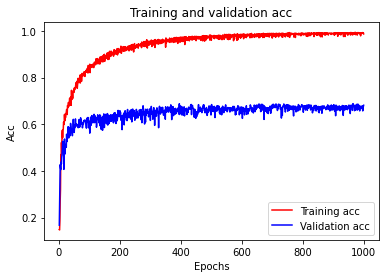

In [27]:
model_cnn.save('/content/drive/MyDrive/TmdJune/10sec/Conv1D_5layers.h5')
model_cnn.evaluate(val_data, val_label)

# 5층 1D convnet
# accuracy: 0.6813
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [28]:
# CRNN with 5층 GRU
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))

model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(128, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 119, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 115, 128)          41088     
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 23, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 19, 128)           82048     
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 3, 128)         

72/72 [==============================] - 0s 6ms/step - loss: 1.6802 - accuracy: 0.6809


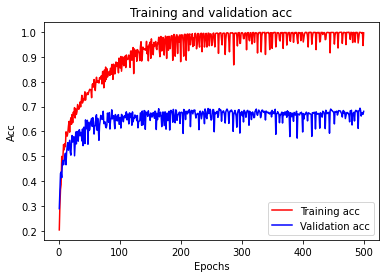

In [30]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/crnn_GRU_5layers.h5')
model_crnn.evaluate(val_data, val_label)

# 5층 CRNN GRU
# accuracy: 0.6809
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [34]:
# CRNN with 6층 GRU
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))

model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(128, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(32, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(32, dropout=0.3))

model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_41 (Conv1D)          (None, 596, 64)           3264      
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 119, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_42 (Conv1D)          (None, 115, 128)          41088     
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 23, 128)          0         
 g1D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 23, 128)           0         
                                                                 
 gru_11 (GRU)                (None, 23, 128)         

72/72 [==============================] - 1s 7ms/step - loss: 1.8352 - accuracy: 0.6497


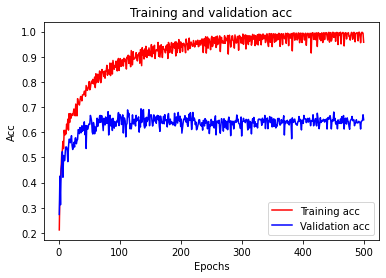

In [35]:
model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/crnn_GRU_6layer.h5')
model_crnn.evaluate(val_data, val_label)

# 6층 CRNN GRU
# accuracy: 0.6576
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [36]:
history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=2)

model_crnn.save('/content/drive/MyDrive/TmdJune/10sec/crnn_GRU_6layer.h5')
model_crnn.evaluate(val_data, val_label)

Epoch 1/500
6/6 - 1s - loss: 0.0142 - accuracy: 0.9964 - val_loss: 1.7893 - val_accuracy: 0.6607 - 1s/epoch - 184ms/step
Epoch 2/500
6/6 - 1s - loss: 0.0125 - accuracy: 0.9972 - val_loss: 1.9485 - val_accuracy: 0.6457 - 839ms/epoch - 140ms/step
Epoch 3/500
6/6 - 1s - loss: 0.0120 - accuracy: 0.9972 - val_loss: 1.9389 - val_accuracy: 0.6519 - 851ms/epoch - 142ms/step
Epoch 4/500
6/6 - 1s - loss: 0.1509 - accuracy: 0.9571 - val_loss: 2.0999 - val_accuracy: 0.6127 - 850ms/epoch - 142ms/step
Epoch 5/500
6/6 - 1s - loss: 0.0907 - accuracy: 0.9749 - val_loss: 1.8372 - val_accuracy: 0.6497 - 842ms/epoch - 140ms/step
Epoch 6/500
6/6 - 1s - loss: 0.0126 - accuracy: 0.9973 - val_loss: 1.8651 - val_accuracy: 0.6484 - 847ms/epoch - 141ms/step
Epoch 7/500
6/6 - 1s - loss: 0.0136 - accuracy: 0.9964 - val_loss: 1.9304 - val_accuracy: 0.6567 - 842ms/epoch - 140ms/step
Epoch 8/500
6/6 - 1s - loss: 0.0118 - accuracy: 0.9977 - val_loss: 1.8949 - val_accuracy: 0.6681 - 843ms/epoch - 140ms/step
Epoch 9/500

[2.244870901107788, 0.6575824022293091]